<a href="https://colab.research.google.com/github/Renojati/MSIB-K2-KelasAwanPintar/blob/main/24_%5BStudent%5D_Revised_Object_Detection_Haar_Cascade_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with Haar Cascade

Deteksi Objek menggunakan Haar feature-based cascade classifiers adalah metode deteksi objek yang diajukan pada tahun 2001 oleh Paul Viola dan Michael Jones dalam [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), kemudian pada tahun 2002 diteruskan oleh Rainer Lienhart dalam [paper](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

<br>

Haar Feature adalah fitur yang didasarkan pada Wavelet Haar. Wavelet Haar adalah gelombang tunggal bujur sangkar (satu interval tinggi dan satu interval rendah).
Untuk dua dimensi, satu terang dan satu gelap. Setiap Haar-like feature terdiri dari gabungan kotak-kotak hitam dan putih.

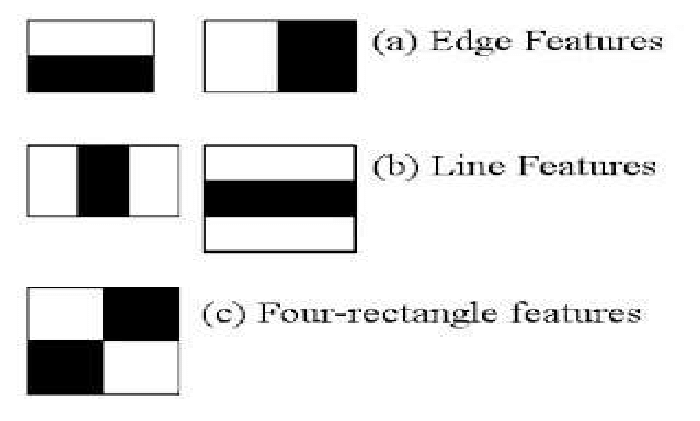

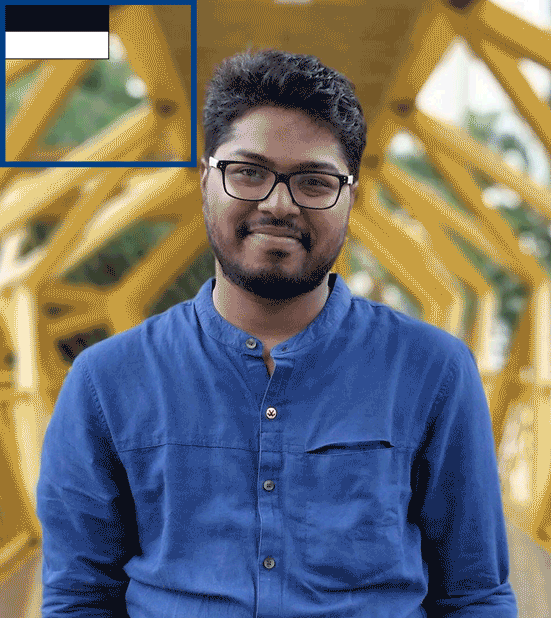

OpenCV menyediakan Cascade Classifier yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifier().

Jenis-jenis pre-trained model Cascade Classifier dapat ditemukan pada link github [berikut](https://github.com/opencv/opencv/tree/3.4/data).

Referensi tambahan :

1.   [Cascade Classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)
2.   [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)




##1 Menyiapkan XML Pre-trained Haarcascade
XML merupakan ekstensi file model yang terbentuk setelah training model dilakukan. Pada latihan ini, kita akan menggunakan model pre-trained yang telah disediakan oleh OpenCV

####1.1 Download pre-trained model Haar Cascade dari Google Drive

In [1]:
!gdown https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J

Downloading...
From: https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J
To: /content/haarcascades.zip
100% 1.46M/1.46M [00:00<00:00, 137MB/s]


####1.2 Extract/Unzip file


In [2]:
!unzip '/content/haarcascades.zip' -d '/content/model'

Archive:  /content/haarcascades.zip
  inflating: /content/model/haarcascade_eye.xml  
  inflating: /content/model/haarcascade_eye_tree_eyeglasses.xml  
  inflating: /content/model/haarcascade_frontalcatface.xml  
  inflating: /content/model/haarcascade_frontalcatface_extended.xml  
  inflating: /content/model/haarcascade_frontalface_alt.xml  
  inflating: /content/model/haarcascade_frontalface_alt_tree.xml  
  inflating: /content/model/haarcascade_frontalface_alt2.xml  
  inflating: /content/model/haarcascade_frontalface_default.xml  
  inflating: /content/model/haarcascade_fullbody.xml  
  inflating: /content/model/haarcascade_lefteye_2splits.xml  
  inflating: /content/model/haarcascade_licence_plate_rus_16stages.xml  
  inflating: /content/model/haarcascade_lowerbody.xml  
  inflating: /content/model/haarcascade_profileface.xml  
  inflating: /content/model/haarcascade_righteye_2splits.xml  
  inflating: /content/model/haarcascade_russian_plate_number.xml  
  inflating: /content/mod

####1.3 Cek dan memastikan ketersediaan model


In [3]:
!ls /content/model

haarcascade_eye_tree_eyeglasses.xml	 haarcascade_lefteye_2splits.xml
haarcascade_eye.xml			 haarcascade_licence_plate_rus_16stages.xml
haarcascade_frontalcatface_extended.xml  haarcascade_lowerbody.xml
haarcascade_frontalcatface.xml		 haarcascade_profileface.xml
haarcascade_frontalface_alt2.xml	 haarcascade_righteye_2splits.xml
haarcascade_frontalface_alt_tree.xml	 haarcascade_russian_plate_number.xml
haarcascade_frontalface_alt.xml		 haarcascade_smile.xml
haarcascade_frontalface_default.xml	 haarcascade_upperbody.xml
haarcascade_fullbody.xml


##2 Menyiapkan Gambar Bahan Percobaan
Sebelumnya, kita perlu men-download gambar agar dapat digunakan didalam google colaboratory.

In [4]:
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O potrait.jpg

--2024-10-28 05:59:44--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 13.227.254.88, 13.227.254.60, 13.227.254.34, ...
Connecting to res.klook.com (res.klook.com)|13.227.254.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112296 (110K) [image/jpeg]
Saving to: ‘potrait.jpg’

potrait.jpg         100%[===================>] 109.66K  --.-KB/s    in 0.005s  

2024-10-28 05:59:44 (21.8 MB/s) - ‘potrait.jpg’ saved [112296/112296]



Kita akan bereksperimen dan mencoba model Haarcascade dengan gambar ini

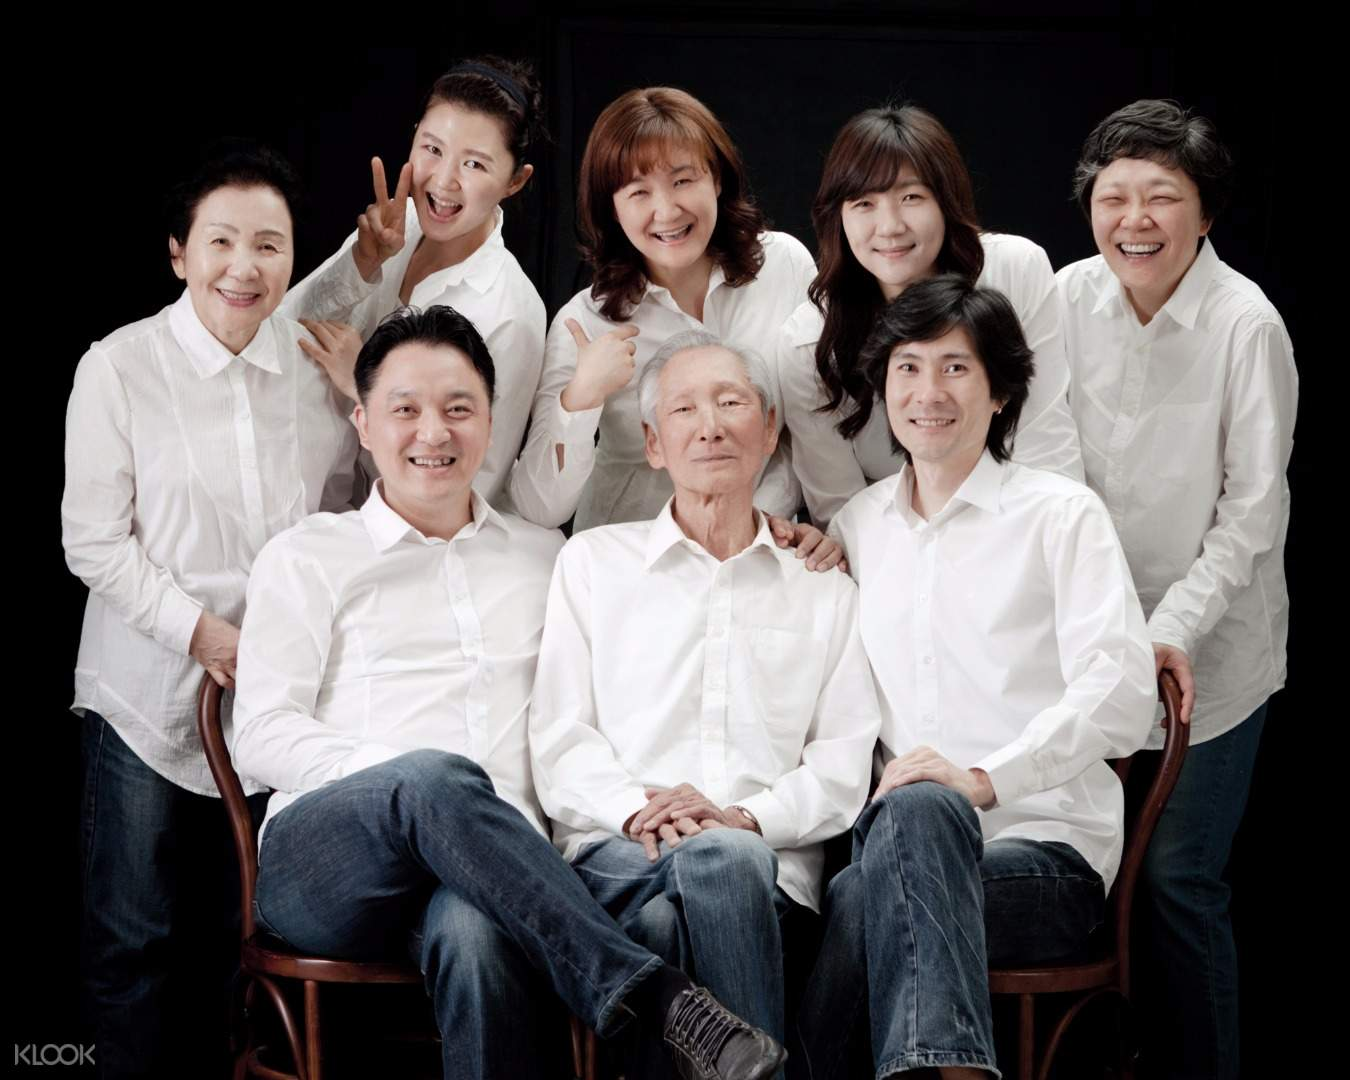

In [5]:
from IPython.display import Image
Image('potrait.jpg')

##3 Mengimpor library
Untuk menggunakan model Haarcascade, kita membutuhkan beberapa library berikut:
1.   **OpenCV** untuk image processing dan untuk load cascade classifier
3.   **Matplotlib dan pylab** untuk menampilkan gambar dan grafik


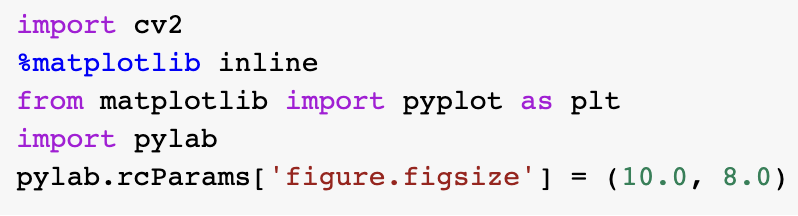

In [6]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
#Access rcParams through matplotlib
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

##4 Load Image
Untuk mengimplementasikan model pada gambar, sebelumnya kita perlu me-load gambar pada base opencv. Disini segala pemrosesan image dapat dilakukan menggunkan function yang disediakan opencv.

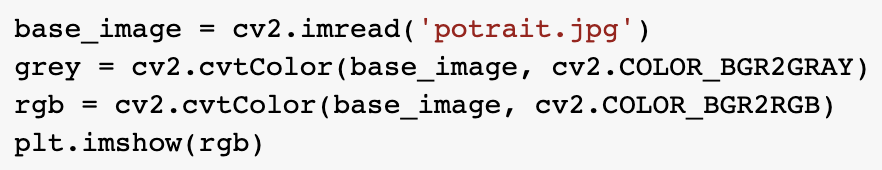

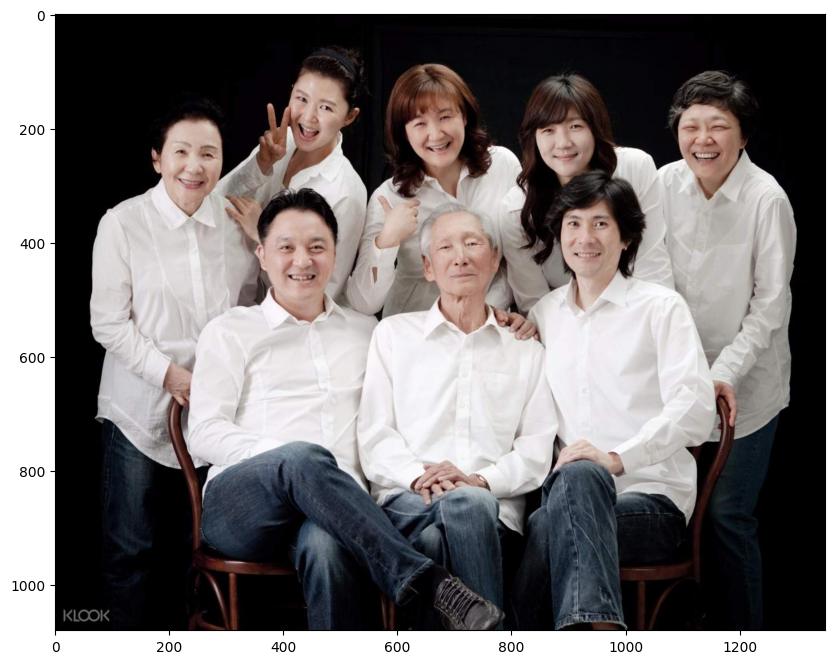

In [7]:
#Ketikkan kode anda di cell ini
import os

# Check if the image file exists in the current directory
if not os.path.exists('potrait.jpg'):
    print("Error: 'potrait.jpg' not found in the current directory.")
    # You may need to adjust the path if the image is in a different location
    # For example: base_image = cv2.imread('../images/potrait.jpg')
else:
    base_image = cv2.imread('potrait.jpg')
    # Use cv2.cvtColor instead of cv2.Color for color conversion
    grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
    rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

##5 Implementasi Model
Setelah menyiapkan pre-trained model file, library dan image yang akan digunakan. Maka kita dapat mulai mengimplementasikannya :)

####5.1 Face Detection
Face detection menggunakan pre-trained model haarcascade_frontalface_default.xml untuk mendeteksi wajah pada gambar

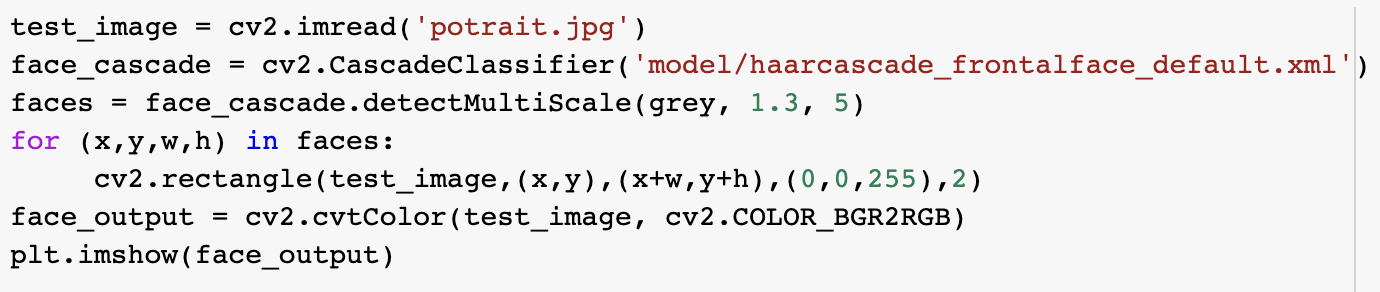

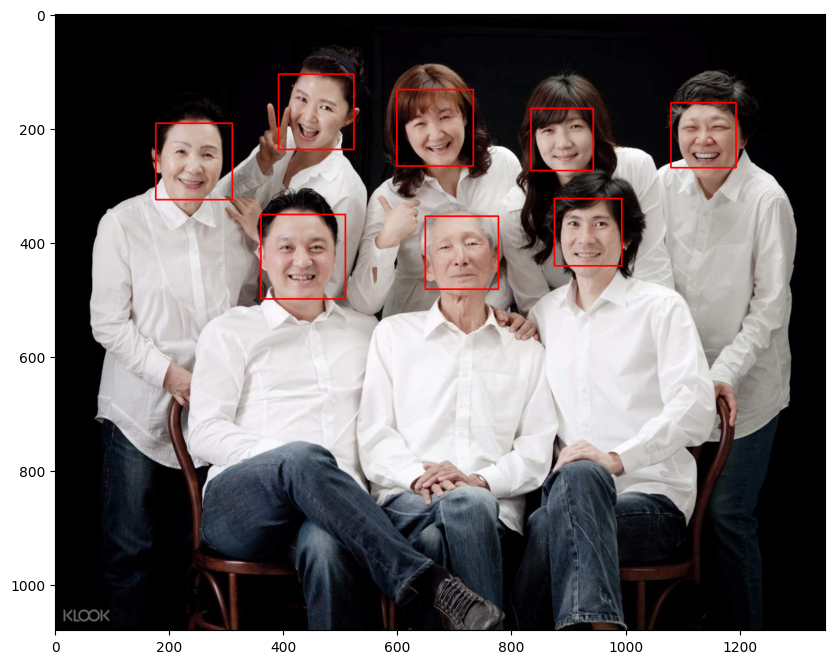

In [10]:
#Ketikkan kode anda di cell ini
test_image = cv2.imread('potrait.jpg')
# Use cv2.CascadeClassifier instead of cv2.Classifier
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
# Assign the result to 'faces' instead of 'face'
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
  cv2.rectangle(test_image, (x,y), (x+w,y+h), (0,0,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

####5.2 Smile Detection
Smile detection menggunakan pre-trained model haarcascade_smile.xml untuk mendeteksi senyum pada gambar.

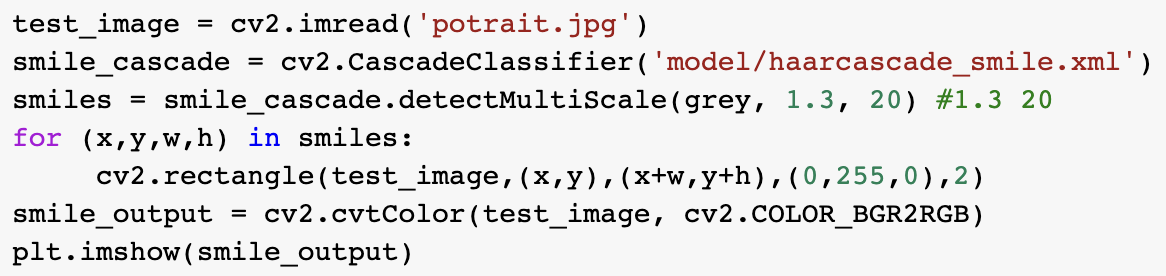

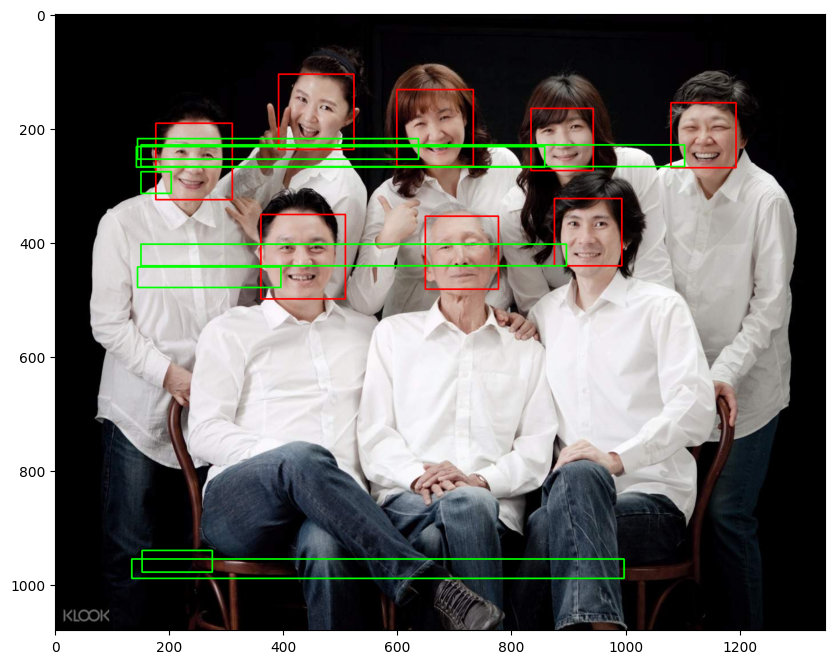

In [11]:
#Ketikkan kode anda di cell ini
test_iamge = cv2.imread('potrait.jpg')
smile_cascade = cv2.CascadeClassifier('model/haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
  cv2.rectangle(test_image,(x,y), (w+w,y+h),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

Pada gambar di atas terdapat False Positive, Untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan smile detection

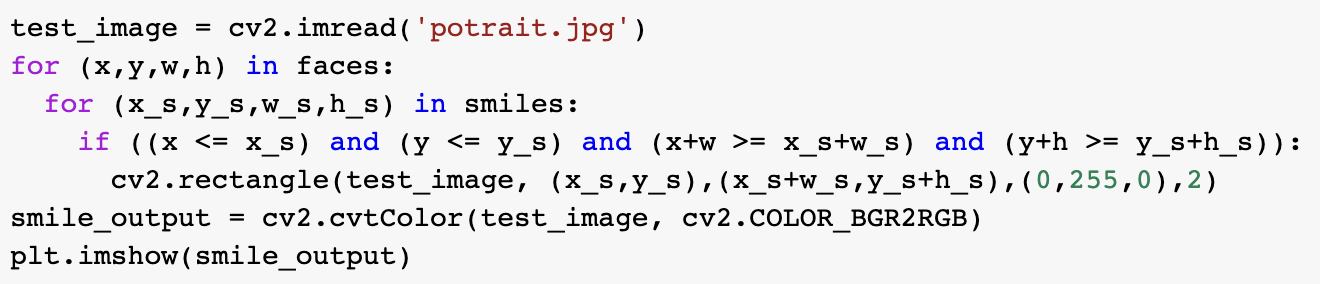

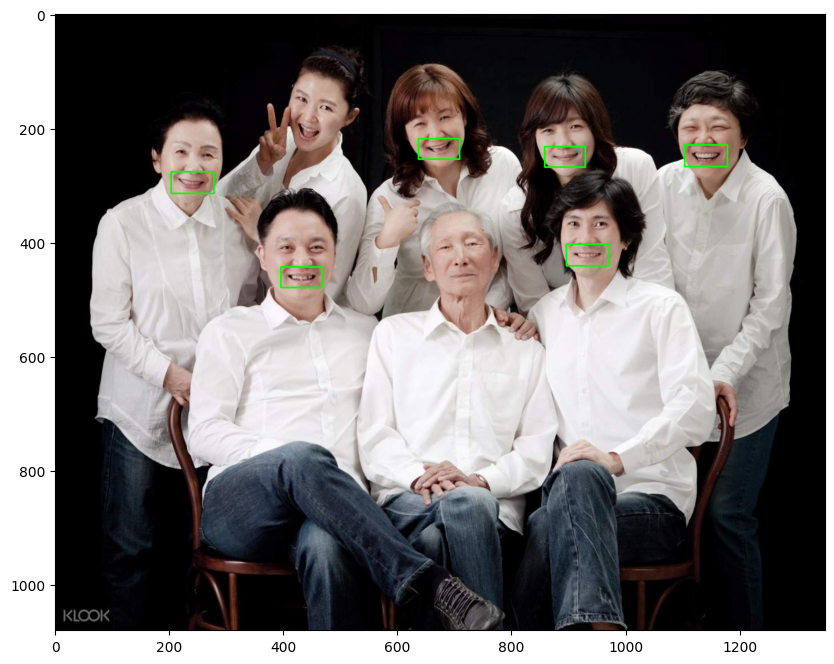

In [14]:
#Ketikkan kode anda di cell ini
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)

####5.3 Eye Detection
Eye Detection menggunakan pre-trained model haarcascade_eye.xml untuk mendeteksi mata pada gambar.

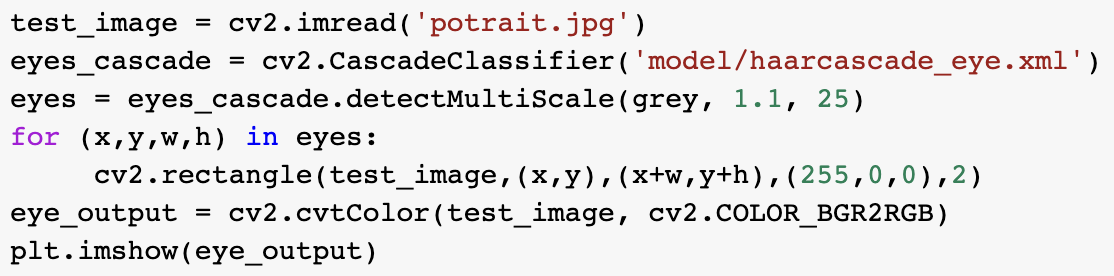

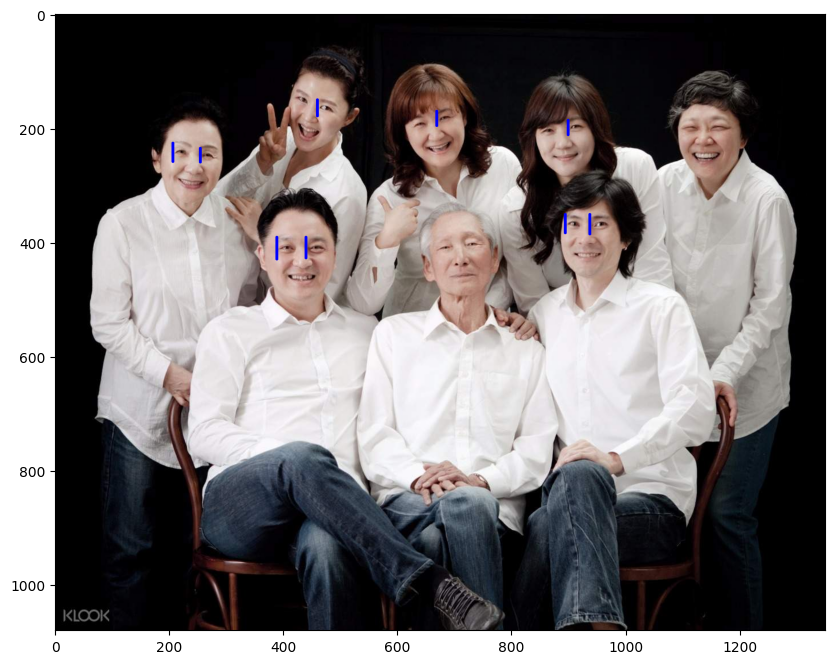

In [16]:
#Ketikkan kode anda di cell ini
test_image = cv2.imread('potrait.jpg')
eyes_cascade = cv2.CascadeClassifier('model/haarcascade_eye.xml')
eyes = eyes_cascade.detectMultiScale(grey, 1.1, 25)
for (x,y,w,h) in eyes:
  cv2.rectangle(test_image, (x,y),(x+2,y+h),(255,0,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_output)



Apabila terdapat False Positive, untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan eye detection

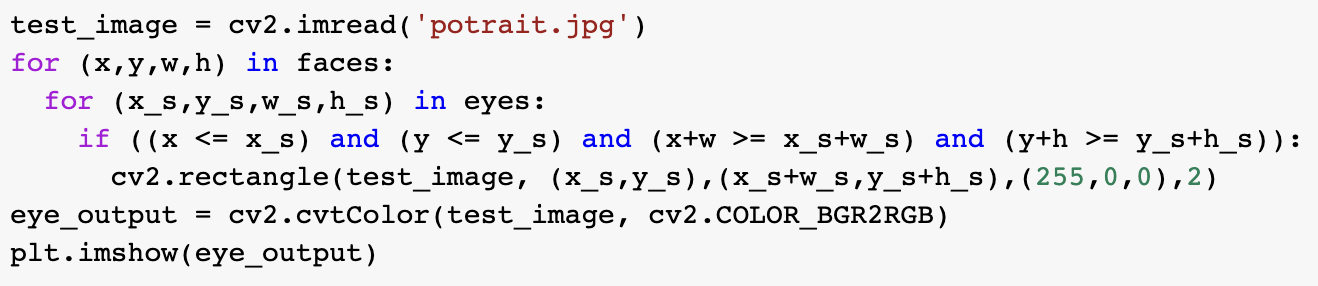

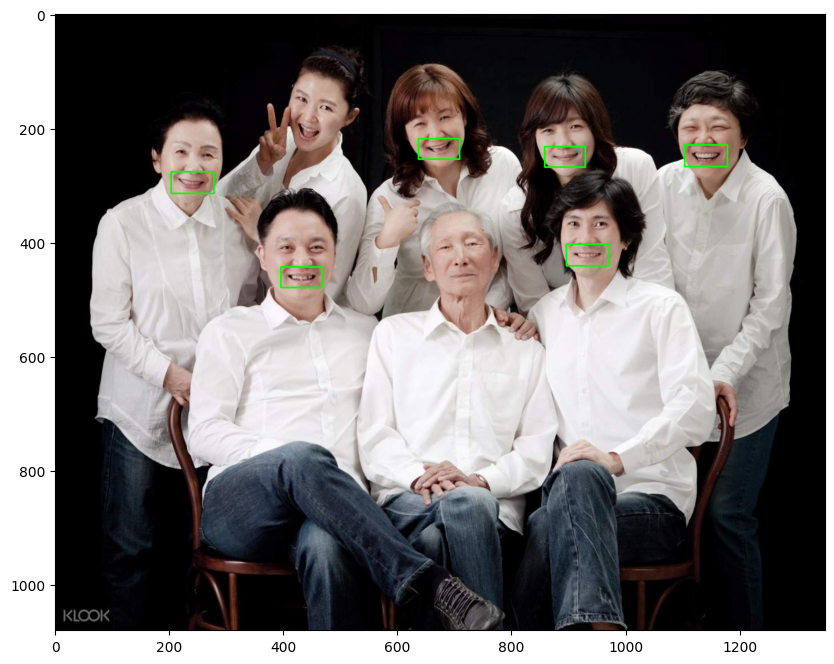

In [17]:
#Ketikkan kode anda di cell ini
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in eyes:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
eye_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)


####5.4 Kombinasi Beberapa Model
Kita bisa mengkombinasikan lebih dari satu model untuk meningkatkan keakuratan pendeteksian object yang kita inginkan

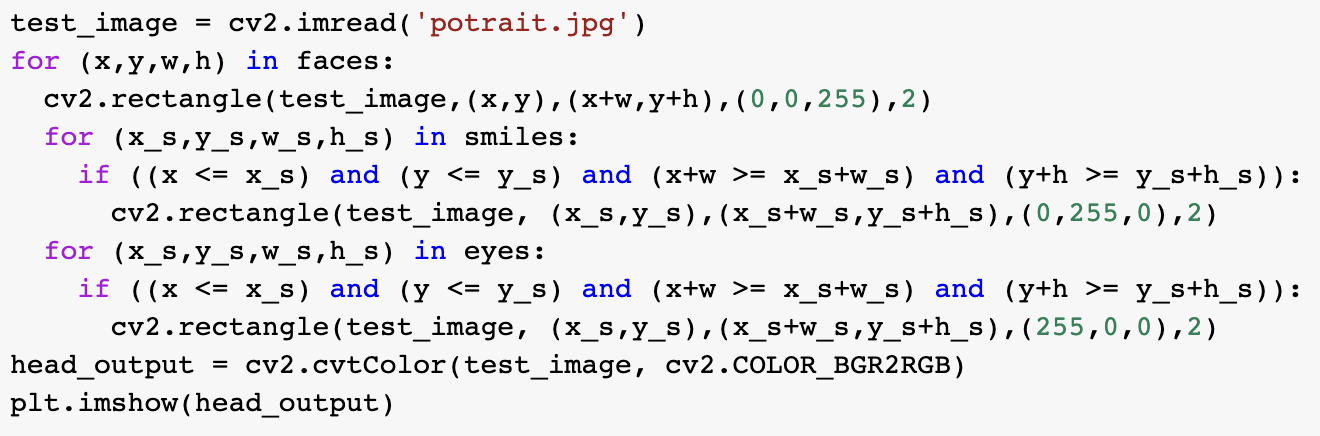

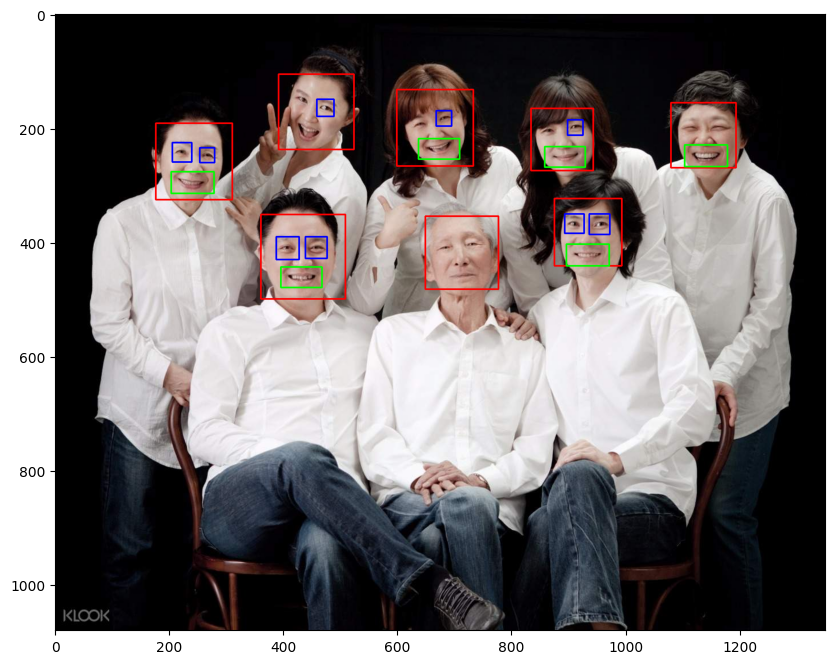

In [20]:
#Ketikkan kode anda di cell
test_image = cv2.imread('potrait.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if((x <= x_s) and (y <= y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
       cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,0,0),2)
head_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(head_output)



# Latihan

### No.1 : Face Detection

Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

### No.2 : Plate Number Detection

Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

In [21]:
!wget https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg. -O mobil.jpg


--2024-10-28 06:42:08--  https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg.
Resolving russiabusinesstoday.com (russiabusinesstoday.com)... 172.67.204.49, 104.21.22.104, 2606:4700:3032::ac43:cc31, ...
Connecting to russiabusinesstoday.com (russiabusinesstoday.com)|172.67.204.49|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-28 06:42:09 ERROR 404: Not Found.



In [51]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
#Access rcParams through matplotlib
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Load Image

--2024-10-28 07:11:58--  https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg
Resolving russiabusinesstoday.com (russiabusinesstoday.com)... 172.67.204.49, 104.21.22.104, 2606:4700:3033::6815:1668, ...
Connecting to russiabusinesstoday.com (russiabusinesstoday.com)|172.67.204.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139042 (136K) [image/jpeg]
Saving to: ‘mobil.jpg’

mobil.jpg           100%[===================>] 135.78K   712KB/s    in 0.2s    

2024-10-28 07:11:59 (712 KB/s) - ‘mobil.jpg’ saved [139042/139042]



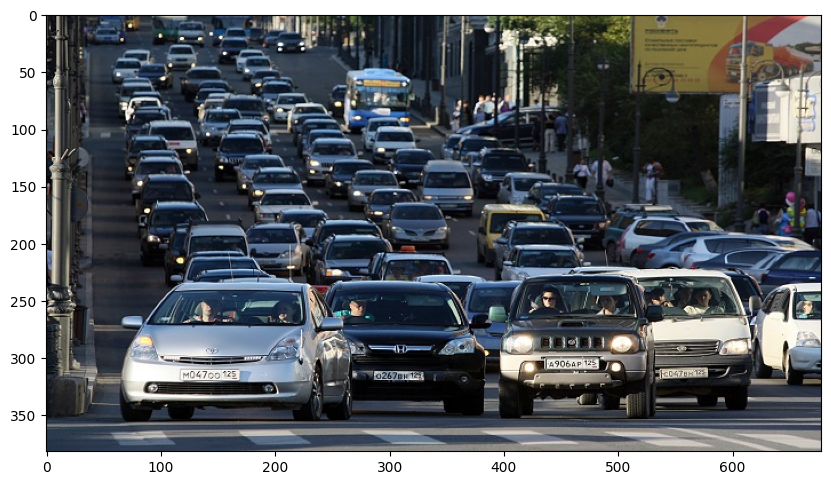

In [52]:
!wget https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg -O mobil.jpg
import os
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
#Access rcParams through matplotlib
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Check if the image file exists in the current directory
if not os.path.exists('mobil.jpg'):
    print("Error: 'mobil.jpg' not found in the current directory.")
    # You may need to adjust the path if the image is in a different location
    # For example: base_image = cv2.imread('../images/potrait.jpg')
else:
    base_image = cv2.imread('mobil.jpg')
    # Check if image loading was successful
    if base_image is None:
        print("Error: Could not load 'mobil.jpg'. Please check the file path and integrity.")
    else:
        # Use cv2.cvtColor instead of cv2.Color for color conversion
        grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
        rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb)

In [53]:
# Load cascade classifier untuk plat nomor (anda perlu melatih ini sendiri atau menggunakan yang sudah ada)
plate_cascade = cv2.CascadeClassifier('path/to/your/plate_cascade.xml')

In [54]:
!pip install wget
import wget

# Specify the URL of the haarcascade XML file
xml_file_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml"  # Replace with the actual URL
xml_file_name = "haarcascade_russian_plate_number.xml"  # Local filename

# Download the XML file if it doesn't exist
if not os.path.exists(xml_file_name):
    wget.download(xml_file_url, xml_file_name)
    print(f"Downloaded {xml_file_name}")
else:
    print(f"{xml_file_name} already exists")

# Load cascade classifier for license plates
plate_cascade = cv2.CascadeClassifier(xml_file_name)

haarcascade_russian_plate_number.xml already exists


In [55]:
import cv2

# Assuming 'base_image' is the image to be used
img = base_image.copy() # Create a copy of base_image and store it as img

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [56]:
# Menyesuaikan kontras (contoh)
gray = cv2.equalizeHist(gray)

# Deteksi plat nomor dengan parameter yang disesuaikan
plates = plate_cascade.detectMultiScale(gray, 1.05, 5)

In [57]:
# Mengurutkan hasil deteksi berdasarkan koordinat y
plates = sorted(plates, key=lambda x: x[1])

# Mengambil 3 plat nomor teratas dan menggambar bounding box
for i in range(3):
    (x,y,w,h) = plates[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

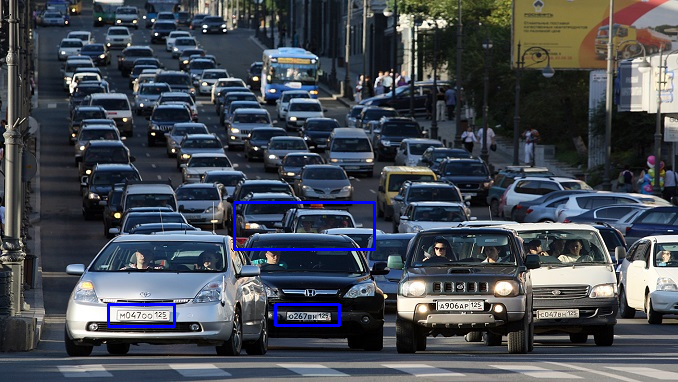

In [58]:
# Import the necessary function from google.colab.patches
from google.colab.patches import cv2_imshow

# Menampilkan hasil
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()